<a href="https://colab.research.google.com/github/prbisv/test-chatbot/blob/main/Chatbot_LSTM_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 6.9 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import pickle
import string
import re

import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import tensorflow
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model

import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
intents_file = open('/content/drive/MyDrive/Capstone Project/Colab Notebook/datasets/mentalhealth_intent_update2_new.json').read()
open_intents = json.loads(intents_file)

open_intents

{'intents': [{'tag': 'salam',
   'patterns': ['Halo',
    'Halo Booboo',
    'Hai',
    'Selamat pagi',
    'Selamat siang',
    'Selamat sore',
    'Selamat malam',
    'Apa kabar?',
    'Hai, mau tanya dong',
    'Halo, saya mau bertanya',
    'Aku mau curhat'],
   'responses': ['Halo! Namaku Booboo. Aku bersedia menjadi teman bicaramu, juga bisa membantumu untuk mengetahui informasi dasar seputar kesehatan mental. Apa yang ingin kamu tanyakan atau sampaikan?'],
   'context': ['']},
  {'tag': 'depresi',
   'patterns': ['Bagaimana cara mengubah perasaan saya tidak berharga bagi semua orang?',
    'Saya nyaris tidak tidur dan tidak melakukan apa-apa selain memikirkan bagaimana saya tidak berharga dan bagaimana saya seharusnya tidak berada di sini',
    'Saya memiliki banyak masalah',
    'Saya memiliki sejarah panjang depresi dan mulai memiliki kecemasan',
    'Saya menghadapi depresi dan kecemasan yang parah',
    'Bagaimana cara mengatasi kecemasan dan depresi ini?',
    'Saya merasa

In [ ]:
#importing the dataset
with open('/content/drive/MyDrive/Capstone Project/Colab Notebook/datasets/mentalhealth_intent_update2_new.json') as content:
  data1 = json.load(content)
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})
print(data)

                                           inputs        tags
0                                            Halo       salam
1                                     Halo Booboo       salam
2                                             Hai       salam
3                                    Selamat pagi       salam
4                                   Selamat siang       salam
..                                            ...         ...
164                                        Dadah!  bye_thanks
165                               Selamat tinggal  bye_thanks
166               Makasih ya, ini sangat membantu  bye_thanks
167  Terima kasih, aku merasa lebih baik sekarang  bye_thanks
168                          Terima kasih Booboo!  bye_thanks

[169 rows x 2 columns]


In [ ]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [ ]:
#input length
input_shape = x_train.shape[1]
print(input_shape)
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
#output length
output_length = le.classes_.shape[0]
print("output length: ",output_length)

45
number of unique words :  459
output length:  16


In [ ]:
#creating the model
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
6/6 [==============================] - 2s 19ms/step - loss: 2.7717 - accuracy: 0.1183
Epoch 2/200
6/6 [==============================] - 0s 20ms/step - loss: 2.7619 - accuracy: 0.1243
Epoch 3/200
6/6 [==============================] - 0s 18ms/step - loss: 2.7517 - accuracy: 0.1243
Epoch 4/200
6/6 [==============================] - 0s 19ms/step - loss: 2.7384 - accuracy: 0.1243
Epoch 5/200
6/6 [==============================] - 0s 18ms/step - loss: 2.7218 - accuracy: 0.1243
Epoch 6/200
6/6 [==============================] - 0s 19ms/step - loss: 2.7097 - accuracy: 0.1243
Epoch 7/200
6/6 [==============================] - 0s 18ms/step - loss: 2.7023 - accuracy: 0.1243
Epoch 8/200
6/6 [==============================] - 0s 18ms/step - loss: 2.6989 - accuracy: 0.1243
Epoch 9/200
6/6 [==============================] - 0s 18ms/step - loss: 2.6937 - accuracy: 0.1243
Epoch 10/200
6/6 [==============================] - 0s 19ms/step - loss: 2.6872 - accuracy: 0.1243
Epoch 11/200
6/6 [=

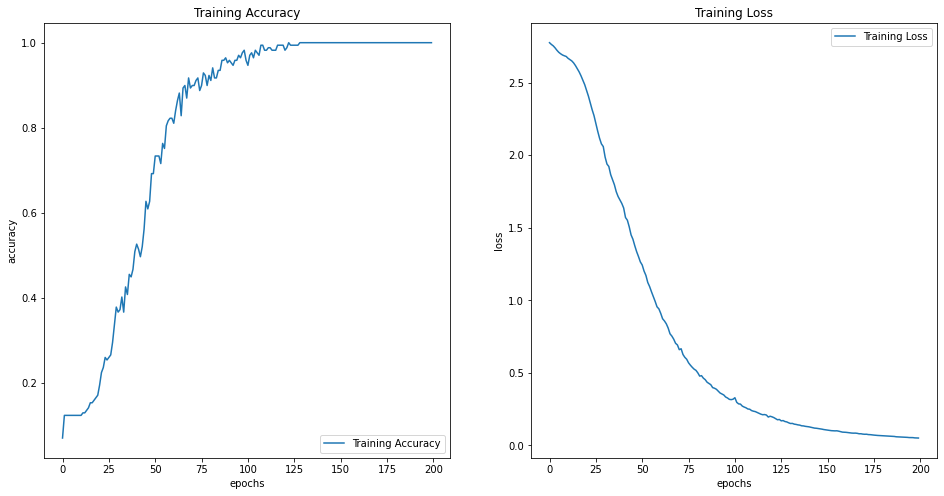

In [ ]:
#learning curves 

acc = train.history['accuracy']
loss=train.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
#chatting
import random
while True:
  texts_p = []
  prediction_input = input('You : ')
  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)
  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)
  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()
  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Chatbot : ",random.choice(responses[response_tag]))
  if response_tag == "bye_thanks":
    break

You : halo booboo
1/1 [==============================] - 0s 48ms/step
Chatbot :  Halo! Namaku Booboo. Aku bersedia menjadi teman bicaramu, juga bisa membantumu untuk mengetahui informasi dasar seputar kesehatan mental. Apa yang ingin kamu tanyakan atau sampaikan?
You : aku sedih sekali
1/1 [==============================] - 0s 20ms/step
Chatbot :  Sepertinya kamu mungkin berjuang dengan depresi. Aku akan menyarankan agar kamu terhubung dengan penyedia yang dapat membantumu mencapai akar dari mana ketidakberdayaan itu berasal dan membantumu mengembangkan rencana pemulihan. Sementara itu, langkah-langkah kecil bisa sangat membantu. Intervensi perawatan diri seperti membuat jurnal perasaanmu, meditasi mindfulness, dan olahraga teratur semuanya bermanfaat untuk terhubung kembali dengan momen saat ini dan mendapatkan motivasi internal. Berfokus pada satu hari pada suatu waktu dan membawa pikiranmu kembali ke masa kini juga dapat bermanfaat. Hei, kamu juga dapat berkonsultasi dengan terapis 

In [ ]:
#convert model to tflite

model = tensorflow.keras.models.load_model("chatbot_model_new.h5")
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("chatbot_model_new.tflite", "wb").write(tflite_model)

print("Model succesfully converted!")